In [2]:

%matplotlib inline 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["font.family"] = "fantasy"
import numpy as np
import random
import scipy
import scipy.misc
import scipy.cluster
from pandas.io.json import json_normalize


import plotly.express as px
import plotly.graph_objects as pgo

In [3]:
df = pd.read_excel('Un.xlsx')
df

,State Abb.,Code,2008_Labor,2008_Employed,2008_Unemployed,2008_(%),2009_Labor,2009_Employed,2009_Unemployed,2009_(%),...,2016_Unemployed,2016_(%),2017_Labor,2017_Employed,2017_Unemployed,2017_(%),2018_Labor,2018_Employed,2018_Unemployed,2018_(%)
0,"Autauga County, AL",1,24687,23420,1267,5.1,24703,22301,2402,9.7,...,1322,5.1,26075,25062,1013,3.9,25957,25015,942,3.6
1,"Baldwin County, AL",1,83223,79372,3851,4.6,82451,74403,8048,9.8,...,4835,5.3,92456,88711,3745,4.1,93849,90456,3393,3.6
2,"Barbour County, AL",1,10161,9267,894,8.8,10003,8572,1431,14.3,...,700,8.3,8349,7863,486,5.8,8373,7940,433,5.2
3,"Bibb County, AL",1,8749,8241,508,5.8,8742,7581,1161,13.3,...,556,6.4,8583,8208,375,4.4,8661,8317,344,4.0
4,"Blount County, AL",1,26698,25453,1245,4.7,26480,23832,2648,10.0,...,1326,5.4,24822,23824,998,4.0,25006,24128,878,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3212,"Utuado Municipio, PR",72,20372,17693,2679,13.2,19955,16433,3522,17.6,...,1068,15.5,6756,5813,943,14.0,6628,5858,770,11.6
3213,"Vega Alta Municipio, PR",72,3214,2811,403,12.5,3124,2425,699,22.4,...,1138,11.5,9785,8738,1047,10.7,9656,8810,846,8.8
3214,"Vega Baja Municipio, PR",72,9324,8036,1288,13.8,9518,7628,1890,19.9,...,1904,13.9,13414,11746,1668,12.4,13199,11826,1373,10.4
3215,"Vieques Municipio, PR",72,10904,8931,1973,18.1,10816,8302,2514,23.2,...,346,10.6,3027,2589,438,14.5,2734,2283,451,16.5


In [4]:
#Data Cleaning
df['State'] = df['State Abb.'].map(lambda x:x. split(',')[1])
df.set_index('State', drop=True, append=False, inplace=True, verify_integrity=False) 
State_total = df.groupby('State').sum()
State_total.drop(['2008_(%)', '2009_(%)','2010_(%)','2011_(%)','2012_(%)','2013_(%)','2014_(%)','2015_(%)','2016_(%)','2017_(%)','2018_(%)'], axis=1,inplace= True )
State_total.drop(['Code'], axis=1,inplace= True)
State_total

,2008_Labor,2008_Employed,2008_Unemployed,2009_Labor,2009_Employed,2009_Unemployed,2010_Labor,2010_Employed,2010_Unemployed,2011_Labor,...,2015_Unemployed,2016_Labor,2016_Employed,2016_Unemployed,2017_Labor,2017_Employed,2017_Unemployed,2018_Labor,2018_Employed,2018_Unemployed
State,,,,,,,,,,,,,,,,,,,,,
AK,437653,407825,29828,445640,409135,36505,361911,333415,28496,365916,...,23654,361796,336982,24814,359299,334449,24850,356886,333376,23510
AL,2176491,2053479,123012,2163003,1924749,238254,2196053,1964561,231492,2202672,...,131480,2182566,2055255,127311,2186871,2090378,96493,2198844,2112351,86493
AR,2110513,1990148,120365,2098593,1916898,181695,1353342,1242500,110842,1362694,...,66928,1339533,1286421,53112,1347020,1297215,49805,1351498,1301460,50038
AZ,3044948,2858082,186866,3063773,2758973,304800,3089706,2769454,320252,3037016,...,191815,3236295,3063018,173277,3321563,3160249,161314,3439758,3273553,166205
CA,17655485,16366248,1289237,17691070,15716711,1974359,18336283,16091950,2244333,18415109,...,1168111,19021177,17980079,1041098,19176369,18257104,919265,19357375,18546600,810775
CO,3414047,3243220,170827,3422433,3169713,252720,2724420,2486405,238015,2736084,...,110291,2891689,2796970,94719,2986524,2902753,83771,3096364,2994756,101608
CT,1303001,1230929,72072,1299453,1194826,104627,1911710,1737448,174262,1914775,...,108081,1891785,1794477,97308,1897642,1808329,89313,1905313,1827070,78243
DC,12245,11531,714,12111,10887,1224,346065,313508,32557,350778,...,26797,395021,370897,24124,401021,376716,24305,404739,381703,23036
DE,555631,523702,31929,557911,509898,48013,434419,397869,36550,443347,...,22632,471852,450526,21326,476271,454928,21343,482465,464337,18128


In [5]:
# Find State_total['20XX_Percentage'] = State_total["20XX_Unemployed"] / State_total["20XX_Labor"]*100

for i in range(11):
    State_total[f'{2008+i}'] = State_total.iloc[0:,3*i+2] / State_total.iloc[0:,3*i]*100
State_total

,2008_Labor,2008_Employed,2008_Unemployed,2009_Labor,2009_Employed,2009_Unemployed,2010_Labor,2010_Employed,2010_Unemployed,2011_Labor,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
State,,,,,,,,,,,,,,,,,,,,,
AK,437653,407825,29828,445640,409135,36505,361911,333415,28496,365916,...,8.191590,7.873759,7.583981,7.125954,6.979036,6.864012,6.511374,6.858561,6.916245,6.587538
AL,2176491,2053479,123012,2163003,1924749,238254,2196053,1964561,231492,2202672,...,11.014964,10.541276,9.636387,7.951458,7.219897,6.782291,6.082849,5.833088,4.412377,3.933567
AR,2110513,1990148,120365,2098593,1916898,181695,1353342,1242500,110842,1362694,...,8.657944,8.190243,8.305166,7.568997,7.237353,6.020735,5.026938,3.964964,3.697421,3.702410
AZ,3044948,2858082,186866,3063773,2758973,304800,3089706,2769454,320252,3037016,...,9.948518,10.365129,9.501004,8.337378,7.748358,6.790671,6.062741,5.354178,4.856569,4.831881
CA,17655485,16366248,1289237,17691070,15716711,1974359,18336283,16091950,2244333,18415109,...,11.160201,12.239847,11.713045,10.371119,8.948150,7.500910,6.203863,5.473363,4.793739,4.188455
CO,3414047,3243220,170827,3422433,3169713,252720,2724420,2486405,238015,2736084,...,7.384221,8.736355,8.362974,7.880401,6.851790,5.000048,3.903951,3.275560,2.804967,3.281526
CT,1303001,1230929,72072,1299453,1194826,104627,1911710,1737448,174262,1914775,...,8.051619,9.115504,8.816023,8.348963,7.812584,6.615564,5.721611,5.143713,4.706525,4.106569
DC,12245,11531,714,12111,10887,1224,346065,313508,32557,350778,...,10.106515,9.407770,10.150865,9.042738,8.493128,7.764499,6.886901,6.107017,6.060780,5.691569
DE,555631,523702,31929,557911,509898,48013,434419,397869,36550,443347,...,8.605853,8.413536,7.502250,7.207606,6.687853,5.719315,4.861994,4.519638,4.481272,3.757371


In [6]:
State_total_percentages_only = State_total.iloc[0:, -11:]
State_total_percentages_only

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
State,,,,,,,,,,,
AK,6.815445,8.191590,7.873759,7.583981,7.125954,6.979036,6.864012,6.511374,6.858561,6.916245,6.587538
AL,5.651850,11.014964,10.541276,9.636387,7.951458,7.219897,6.782291,6.082849,5.833088,4.412377,3.933567
AR,5.703116,8.657944,8.190243,8.305166,7.568997,7.237353,6.020735,5.026938,3.964964,3.697421,3.702410
AZ,6.136919,9.948518,10.365129,9.501004,8.337378,7.748358,6.790671,6.062741,5.354178,4.856569,4.831881
CA,7.302190,11.160201,12.239847,11.713045,10.371119,8.948150,7.500910,6.203863,5.473363,4.793739,4.188455
CO,5.003651,7.384221,8.736355,8.362974,7.880401,6.851790,5.000048,3.903951,3.275560,2.804967,3.281526
CT,5.531231,8.051619,9.115504,8.816023,8.348963,7.812584,6.615564,5.721611,5.143713,4.706525,4.106569
DC,5.830951,10.106515,9.407770,10.150865,9.042738,8.493128,7.764499,6.886901,6.107017,6.060780,5.691569
DE,5.746440,8.605853,8.413536,7.502250,7.207606,6.687853,5.719315,4.861994,4.519638,4.481272,3.757371


In [7]:
# The same table, but flipped around

State_total_percentages_only_flipped = State_total_percentages_only.transpose()
State_total_percentages_only_flipped = State_total_percentages_only_flipped.rename({'State': 'Years'}, axis=1)

State_total_percentages_only_flipped.index.names = ['Years']

State_total_percentages_only_flipped

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Years,,,,,,,,,,,,,,,,,,,,,
2008,6.815445,5.651850,5.703116,6.136919,7.302190,5.003651,5.531231,5.830951,5.746440,6.304652,...,3.445852,6.574464,4.800859,3.605765,3.963809,4.468307,5.367466,4.869769,4.373240,3.816991
2009,8.191590,11.014964,8.657944,9.948518,11.160201,7.384221,8.051619,10.106515,8.605853,10.458695,...,5.657478,10.442183,7.570993,7.286639,6.726837,6.367395,9.141743,8.542072,7.730744,7.159447
2010,7.873759,10.541276,8.190243,10.365129,12.239847,8.736355,9.115504,9.407770,8.413536,11.055140,...,4.982044,9.665157,8.146957,7.837526,7.150092,6.097334,9.990044,8.668490,8.656710,6.447146
2011,7.583981,9.636387,8.305166,9.501004,11.713045,8.362974,8.816023,10.150865,7.502250,9.987636,...,4.735608,8.979799,7.752498,6.746581,6.588181,5.485775,9.280552,7.752707,8.060221,5.800238
2012,7.125954,7.951458,7.568997,8.337378,10.371119,7.880401,8.348963,9.042738,7.207606,8.465628,...,4.281643,7.828278,6.722672,5.401648,6.057554,4.951332,8.124213,7.045118,7.492564,5.316788
2013,6.979036,7.219897,7.237353,7.748358,8.948150,6.851790,7.812584,8.493128,6.687853,7.231658,...,3.791138,7.790089,6.260540,4.584350,5.713552,4.417526,7.045083,6.732417,6.777912,4.722270
2014,6.864012,6.782291,6.020735,6.790671,7.500910,5.000048,6.615564,7.764499,5.719315,6.282358,...,3.432776,6.584853,5.102116,3.814052,5.227725,3.939987,6.127697,5.404942,6.636580,4.140302
2015,6.511374,6.082849,5.026938,6.062741,6.203863,3.903951,5.721611,6.886901,4.861994,5.455398,...,3.100381,5.631034,4.444273,3.626301,4.455703,3.559337,5.639116,4.547491,6.737758,4.315830
2016,6.858561,5.833088,3.964964,5.354178,5.473363,3.275560,5.143713,6.107017,4.519638,4.793597,...,2.980111,4.712427,4.614466,3.447996,4.092917,3.224431,5.253797,4.000859,6.103948,5.347184


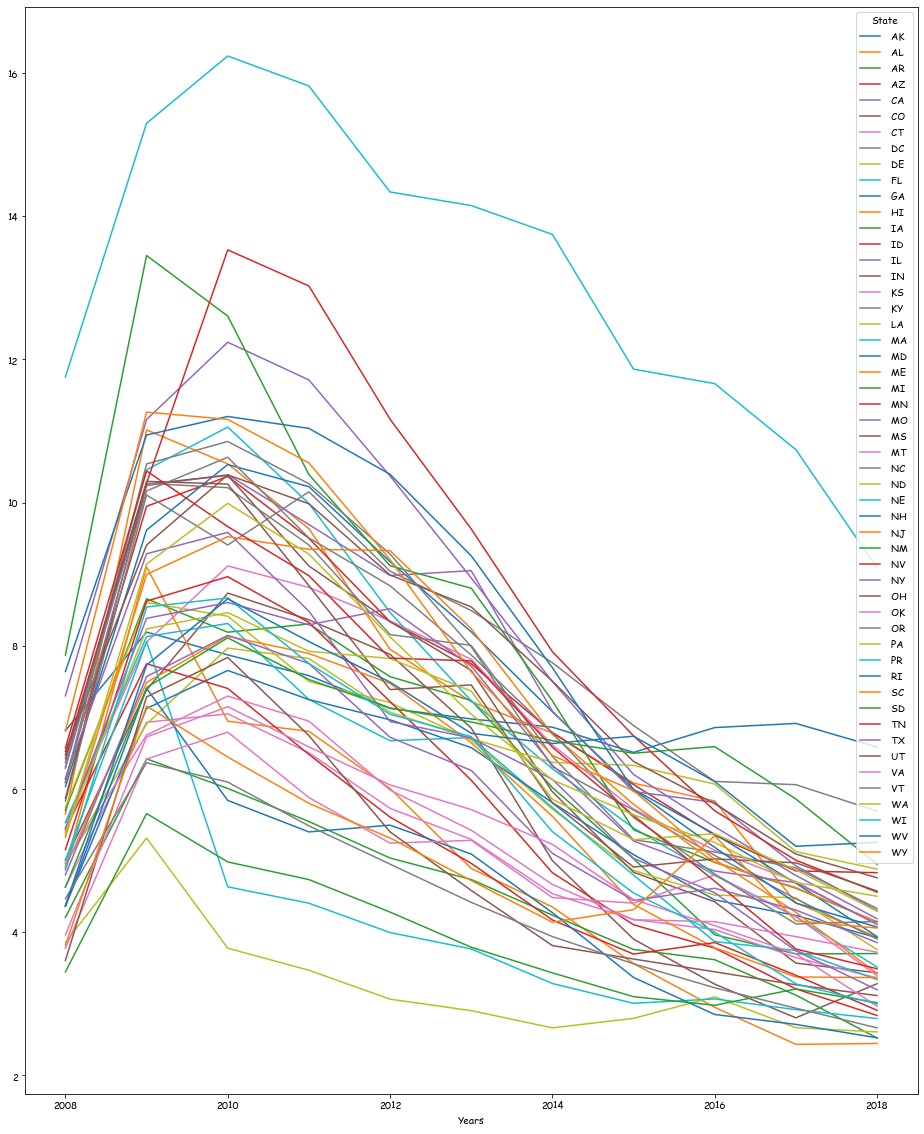

In [8]:
State_total_percentages_only_flipped.plot(figsize=(16, 20))

In [9]:

# Read in the data and drop Excel sheet comment blocks
hc_converage_2008_2018 = pd.read_excel('hic04_acs.xls', skiprows = [0, 1, 2]).dropna(thresh = 2)

# Prepare the headers by year and sub-section
years = list(range(2018, 2007, -1))

each_year_sub = ['Estimate_number', 'Margin_of_Error_number', 'Percentage', 'Margin_of_Error_percentage']

headers_for_hc_coverage_census = ['Nation/State', 'Coverage Type']

for each in years:
    for each_sub in each_year_sub:
        headers_for_hc_coverage_census.append(str(each) + '_' + each_sub)

# Assign headers to data
hc_converage_2008_2018.columns = headers_for_hc_coverage_census
hc_converage_2008_2018 = hc_converage_2008_2018[hc_converage_2008_2018['Coverage Type'].notna()].ffill(axis=0)
hc_converage_2008_2018

,Nation/State,Coverage Type,2018_Estimate_number,2018_Margin_of_Error_number,2018_Percentage,2018_Margin_of_Error_percentage,2017_Estimate_number,2017_Margin_of_Error_number,2017_Percentage,2017_Margin_of_Error_percentage,...,2010_Percentage,2010_Margin_of_Error_percentage,2009_Estimate_number,2009_Margin_of_Error_number,2009_Percentage,2009_Margin_of_Error_percentage,2008_Estimate_number,2008_Margin_of_Error_number,2008_Percentage,2008_Margin_of_Error_percentage
1,UNITED STATES,Total,322249,15,100.0,Z,320775,15,100,Z,...,100.0,Z,301472,23,100.0,Z,298571,20,100.0,Z
2,UNITED STATES,Any coverage,293684,178,91.1,0.1,292756,184,91.3,0.1,...,84.5,0.1,255807,235,84.9,0.1,255068,230,85.4,0.1
3,UNITED STATES,Uninsured,28566,183,8.9,0.1,28019,188,8.7,0.1,...,15.5,0.1,45665,238,15.1,0.1,43503,233,14.6,0.1
4,UNITED STATES,Private,217623,404,67.5,0.1,216952,419,67.6,0.1,...,65.8,0.1,203300,379,67.4,0.1,207786,353,69.6,0.1
5,UNITED STATES,..Employer-based,177740,354,55.2,0.1,176319,358,55,0.1,...,54.9,0.1,170633,310,56.6,0.1,175294,308,58.7,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,WYOMING,..TRICARE,23,4,4.1,0.6,20,3,3.6,0.6,...,3.7,0.7,21,3,3.9,0.5,20,3,3.8,0.6
569,WYOMING,Public,155,6,27.3,1,161,6,28.3,1.1,...,26.0,1.1,134,5,25.1,0.9,129,5,24.6,1
570,WYOMING,..Medicaid,58,5,10.3,0.9,69,6,12.2,1,...,12.8,1,64,5,12.0,0.9,60,5,11.4,0.9
571,WYOMING,..Medicare,102,3,18.0,0.4,98,2,17.3,0.4,...,13.3,0.4,73,2,13.7,0.5,70,2,13.5,0.3


In [10]:
hc_converage_2008_2018_estimate_percentages_only = hc_converage_2008_2018.iloc[0:, [0, 1, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44]]

# Inspect only the "Uninsured" percentage, including a nationwide one
hc_uninsured_perc = hc_converage_2008_2018_estimate_percentages_only[hc_converage_2008_2018_estimate_percentages_only['Coverage Type'] == 'Uninsured']
hc_uninsured_perc = hc_uninsured_perc.drop(['Coverage Type'], axis = 1).reset_index().drop(['index'], axis = 1).replace("N", np.nan).bfill(axis=1).astype(
    {'2018_Percentage': 'float64', 
     '2017_Percentage': 'float64',
     '2016_Percentage': 'float64',
     '2015_Percentage': 'float64',
     '2014_Percentage': 'float64',
     '2013_Percentage': 'float64',
     '2012_Percentage': 'float64',
     '2011_Percentage': 'float64',
     '2010_Percentage': 'float64',
     '2009_Percentage': 'float64',
     '2008_Percentage': 'float64'
    })
hc_uninsured_perc

,Nation/State,2018_Percentage,2017_Percentage,2016_Percentage,2015_Percentage,2014_Percentage,2013_Percentage,2012_Percentage,2011_Percentage,2010_Percentage,2009_Percentage,2008_Percentage
0,UNITED STATES,8.9,8.7,8.6,9.4,11.7,14.5,14.8,15.1,15.5,15.1,14.6
1,ALABAMA,10.0,9.4,9.1,10.1,12.1,13.6,13.3,14.3,14.6,13.8,13.3
2,ALASKA,12.6,13.7,14.0,14.9,17.2,18.5,20.5,20.1,19.9,21.1,19.1
3,ARIZONA,10.6,10.1,10.0,10.8,13.6,17.1,17.6,17.2,16.9,17.3,18.0
4,ARKANSAS,8.2,7.9,7.9,9.5,11.8,16.0,16.4,17.1,17.5,17.0,17.1
5,CALIFORNIA,7.2,7.2,7.3,8.6,12.4,17.2,17.9,18.1,18.5,18.0,17.3
6,COLORADO,7.5,7.5,7.5,8.1,10.3,14.1,14.7,15.1,15.9,15.8,16.7
7,CONNECTICUT,5.3,5.5,4.9,6.0,6.9,9.4,9.1,8.8,9.1,8.8,8.8
8,DELAWARE,5.7,5.7,5.7,5.9,7.8,9.1,8.8,9.4,9.7,10.2,10.0
9,DISTRICT OF COLUMBIA,3.2,3.8,3.9,3.8,5.3,6.7,5.9,6.9,7.6,7.0,7.6


In [11]:

# The same table, but flipped around

hc_uninsured_perc_flipped = hc_uninsured_perc.transpose().reset_index()
hc_uninsured_perc_flipped.columns = hc_uninsured_perc_flipped.iloc[0]
hc_uninsured_perc_flipped = hc_uninsured_perc_flipped.rename({'Nation/State': 'Years'}, axis=1)
hc_uninsured_perc_flipped = hc_uninsured_perc_flipped[1:].iloc[::-1].reset_index().drop(['index'], axis = 1)
hc_uninsured_perc_flipped['Years'] = hc_uninsured_perc_flipped['Years'].str.rstrip('egatnecreP_').astype({'Years': 'int'})
hc_uninsured_perc_flipped

,Years,UNITED STATES,ALABAMA,ALASKA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,...,SOUTH DAKOTA,TENNESSEE,TEXAS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING
0,2008,14.6,13.3,19.1,18,17.1,17.3,16.7,8.8,10,...,11.1,12.9,23.4,15,8.8,11.6,12.5,14.8,8.8,13.7
1,2009,15.1,13.8,21.1,17.3,17,18,15.8,8.8,10.2,...,13.1,14.3,23.8,14.6,8.6,11.9,13.4,14.2,9.4,15.2
2,2010,15.5,14.6,19.9,16.9,17.5,18.5,15.9,9.1,9.7,...,12.4,14.4,23.7,15.3,8,13.1,14.2,14.6,9.4,14.9
3,2011,15.1,14.3,20.1,17.2,17.1,18.1,15.1,8.8,9.4,...,11.9,14.6,23,15.3,6.6,12.5,14.2,14.9,9,15.4
4,2012,14.8,13.3,20.5,17.6,16.4,17.9,14.7,9.1,8.8,...,11.5,13.9,22.5,14.5,6.5,12.5,13.9,14.4,9,15.4
5,2013,14.5,13.6,18.5,17.1,16,17.2,14.1,9.4,9.1,...,11.3,13.9,22.1,14,7.2,12.3,14,14,9.1,13.4
6,2014,11.7,12.1,17.2,13.6,11.8,12.4,10.3,6.9,7.8,...,9.8,12,19.1,12.5,5,10.9,9.2,8.6,7.3,12
7,2015,9.4,10.1,14.9,10.8,9.5,8.6,8.1,6,5.9,...,10.2,10.3,17.1,10.5,3.8,9.1,6.6,6,5.7,11.5
8,2016,8.6,9.1,14,10,7.9,7.3,7.5,4.9,5.7,...,8.7,9,16.6,8.8,3.7,8.7,6,5.3,5.3,11.5
9,2017,8.7,9.4,13.7,10.1,7.9,7.2,7.5,5.5,5.7,...,9.1,9.5,17.3,9.2,4.6,8.8,6.1,6.1,5.4,12.3


Text(0, 0.5, 'Percentage of Uninsured People')

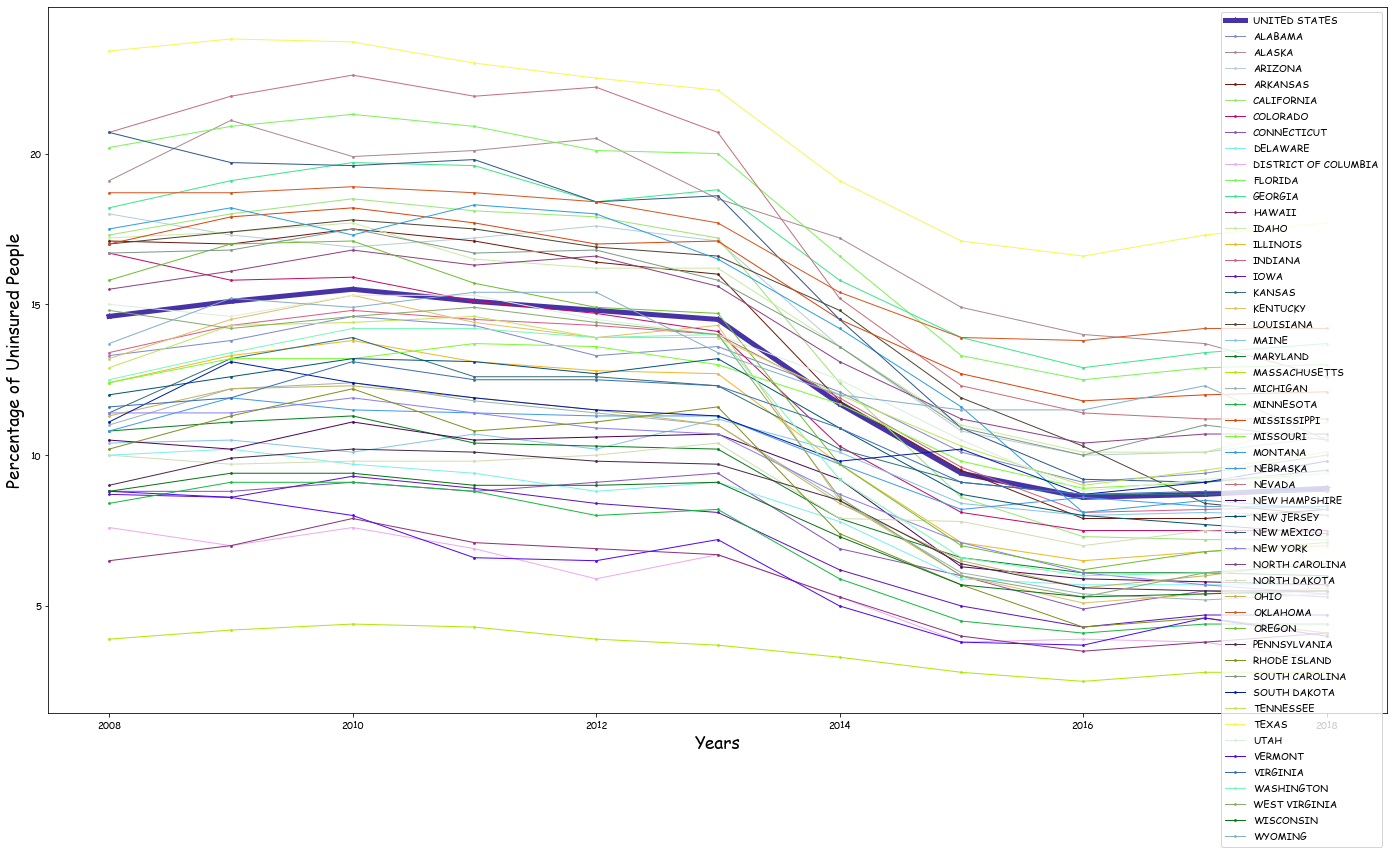

In [12]:
plt.figure(figsize=(24,13))
plt.plot( 'Years', 'UNITED STATES', data=hc_uninsured_perc_flipped, marker='*', color='#4832a8', linewidth=5)
for each_state in hc_uninsured_perc_flipped.columns[2:]:
    plt.plot( 'Years', each_state, data=hc_uninsured_perc_flipped, marker='p', markersize=2, color=(random.random(), random.random(), random.random()), linewidth=1)
plt.legend()
plt.xlabel('Years', fontsize = 'xx-large')
plt.ylabel('Percentage of Uninsured People', fontsize = 'xx-large')

In [13]:
# These codes of merging won't work because the Years datatypes are different between the two frames
#plat_df = pd.merge(State_total_percentages_only_flipped , hc_uninsured_perc_flipped, on="Years", how="left")
#plat_df = pd.concat(State_total_percentages_only_flipped , hc_uninsured_perc_flipped,axis=0,join='outer',join_axes=None,ignore_index=False,keys=None,levels=None,names=None,verigy_integrity=False)


In [14]:
# State-wise unemployment rates
unemployment_perc_mergeable = State_total_percentages_only_flipped.reset_index().astype({'Years': 'int32'}).add_suffix('_unemployment')
# State-wise uninsured rates
# Also converting all state names to their abbreviated forms for convenience
# Conversion standard referenced from: https://gist.github.com/mshafrir/2646763
hc_uninsured_perc_mergeable = hc_uninsured_perc_flipped.rename(columns={
    "UNITED STATES": "USA",
    "ALABAMA": "AL",
    "ALASKA": "AK",
    "ARIZONA": "AZ",
    "ARKANSAS": "AR",
    "CALIFORNIA": "CA",
    "COLORADO": "CO",
    "CONNECTICUT": "CT",
    "DELAWARE": "DE",
    "DISTRICT OF COLUMBIA": "DC",
    "FLORIDA": "FL",
    "GEORGIA": "GA",
    "GU": "Guam",
    "HAWAII": "HI",
    "IDAHO": "ID",
    "ILLINOIS": "IL",
    "INDIANA": "IN",
    "IOWA": "IA",
    "KANSAS": "KS",
    "KENTUCKY": "KY",
    "LOUISIANA": "LA",
    "MAINE": "ME",
    "MARYLAND": "MD",
    "MASSACHUSETTS": "MA",
    "MICHIGAN": "MI",
    "MINNESOTA": "MN",
    "MISSISSIPPI": "MS",
    "MISSOURI": "MO",
    "MONTANA": "MT",
    "NEBRASKA": "NE",
    "NEVADA": "NV",
    "NEW HAMPSHIRE": "NH",
    "NEW JERSEY": "NJ",
    "NEW MEXICO": "NM",
    "NEW YORK": "NY",
    "NORTH CAROLINA": "NC",
    "NORTH DAKOTA": "ND",
    "OHIO": "OH",
    "OKLAHOMA": "OK",
    "OREGON": "OR",
    "PENNSYLVANIA": "PA",
    "RHODE ISLAND": "RI",
    "SOUTH CAROLINA": "SC",
    "SOUTH DAKOTA": "SD",
    "TENNESSEE": "TN",
    "TEXAS": "TX",
    "UTAH": "UT",
    "VERMONT": "VT",
    "VIRGINIA": "VA",
    "WASHINGTON": "WA",
    "WEST VIRGINIA": "WV",
    "WISCONSIN": "WI",
    "WYOMING": "WY"}).add_suffix('_uninsured')

# Merged dataframe with suffixes to differentiate
unem_unin_merged = pd.merge(hc_uninsured_perc_mergeable, unemployment_perc_mergeable, left_on='Years_uninsured', right_on='Years_unemployment').drop(['Years_unemployment'], axis = 1)
unem_unin_merged = unem_unin_merged.rename(columns={"Years_uninsured" : "Years"})
unem_unin_merged

,Years,USA_uninsured,AL_uninsured,AK_uninsured,AZ_uninsured,AR_uninsured,CA_uninsured,CO_uninsured,CT_uninsured,DE_uninsured,...,SD_unemployment,TN_unemployment,TX_unemployment,UT_unemployment,VA_unemployment,VT_unemployment,WA_unemployment,WI_unemployment,WV_unemployment,WY_unemployment
0,2008,14.6,13.3,19.1,18,17.1,17.3,16.7,8.8,10,...,3.445852,6.574464,4.800859,3.605765,3.963809,4.468307,5.367466,4.869769,4.373240,3.816991
1,2009,15.1,13.8,21.1,17.3,17,18,15.8,8.8,10.2,...,5.657478,10.442183,7.570993,7.286639,6.726837,6.367395,9.141743,8.542072,7.730744,7.159447
2,2010,15.5,14.6,19.9,16.9,17.5,18.5,15.9,9.1,9.7,...,4.982044,9.665157,8.146957,7.837526,7.150092,6.097334,9.990044,8.668490,8.656710,6.447146
3,2011,15.1,14.3,20.1,17.2,17.1,18.1,15.1,8.8,9.4,...,4.735608,8.979799,7.752498,6.746581,6.588181,5.485775,9.280552,7.752707,8.060221,5.800238
4,2012,14.8,13.3,20.5,17.6,16.4,17.9,14.7,9.1,8.8,...,4.281643,7.828278,6.722672,5.401648,6.057554,4.951332,8.124213,7.045118,7.492564,5.316788
5,2013,14.5,13.6,18.5,17.1,16,17.2,14.1,9.4,9.1,...,3.791138,7.790089,6.260540,4.584350,5.713552,4.417526,7.045083,6.732417,6.777912,4.722270
6,2014,11.7,12.1,17.2,13.6,11.8,12.4,10.3,6.9,7.8,...,3.432776,6.584853,5.102116,3.814052,5.227725,3.939987,6.127697,5.404942,6.636580,4.140302
7,2015,9.4,10.1,14.9,10.8,9.5,8.6,8.1,6,5.9,...,3.100381,5.631034,4.444273,3.626301,4.455703,3.559337,5.639116,4.547491,6.737758,4.315830
8,2016,8.6,9.1,14,10,7.9,7.3,7.5,4.9,5.7,...,2.980111,4.712427,4.614466,3.447996,4.092917,3.224431,5.253797,4.000859,6.103948,5.347184
9,2017,8.7,9.4,13.7,10.1,7.9,7.2,7.5,5.5,5.7,...,3.208166,3.766298,4.310461,3.266018,3.698107,2.939271,4.696116,3.279237,5.200620,4.158989


In [15]:
#for each_column in unem_unin_merged:
#    print(each_column)

# Lists out columns that describe uninsurted percentages. The first one is nationwide (USA_uninsured) and so it is temporarily removed through slicing
uninsured_cols = [col for col in unem_unin_merged.columns if 'uninsured' in col]
unemployment_cols = [col for col in unem_unin_merged.columns if 'unemployment' in col]

# First, convers uninsured rates into float64 so correlations can be drawn
for each in uninsured_cols:
    unem_unin_merged = unem_unin_merged.astype({each: 'float64'})

# Then, iterates through each states where uninsured rate and unemployment columns match. Prints outs the correlation value
for each_uni in uninsured_cols[1:]:
    for each_une in unemployment_cols:
        if each_uni[0:2] == each_une[1:3]:
            print(each_uni[0:2], "Correlation:", unem_unin_merged[each_uni].corr(unem_unin_merged[each_une]))

AL Correlation: 0.8052972904590544
AK Correlation: 0.7375379483341384
AZ Correlation: 0.7857687140030747
AR Correlation: 0.9130653123103446
CA Correlation: 0.909136913780189
CO Correlation: 0.8600395765165502
CT Correlation: 0.8453389952634659
DE Correlation: 0.8796743848323417
DC Correlation: 0.6626683979521064
FL Correlation: 0.8811467753808617
GA Correlation: 0.8896565125682192
HI Correlation: 0.8672999863728581
ID Correlation: 0.8756588588392105
IL Correlation: 0.8941751223374383
IN Correlation: 0.9162640814212031
IA Correlation: 0.8592613671671379
KS Correlation: 0.9478192414505938
KY Correlation: 0.907815958900613
LA Correlation: 0.7008587981899724
ME Correlation: 0.8336792456485762
MD Correlation: 0.7842553552991332
MA Correlation: 0.9310242298112608
MI Correlation: 0.9235011666186957
MN Correlation: 0.9153855776292229
MS Correlation: 0.8982999291393812
MO Correlation: 0.8780265511952376
MT Correlation: 0.8564778962622798
NE Correlation: 0.7344934024159502
NV Correlation: 0.8576

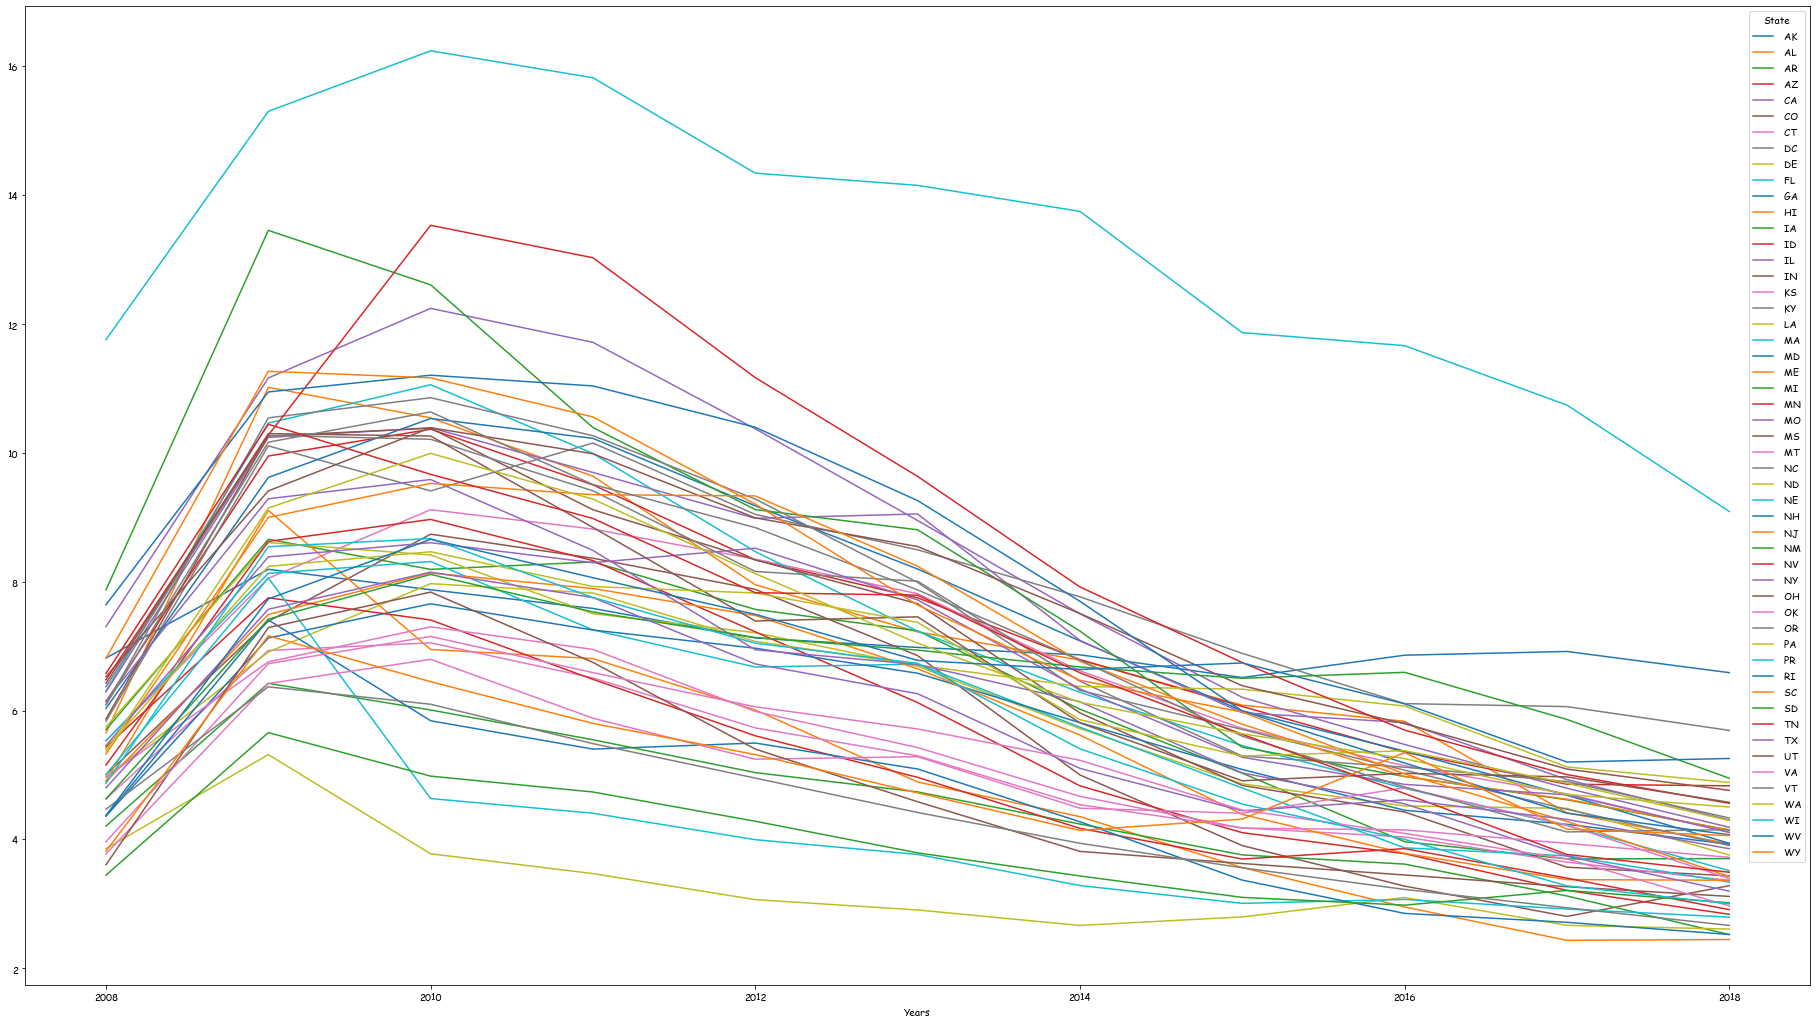

State  Years        AK         AL        AR         AZ         CA        CO  \
0       2008  6.815445   5.651850  5.703116   6.136919   7.302190  5.003651   
1       2009  8.191590  11.014964  8.657944   9.948518  11.160201  7.384221   
2       2010  7.873759  10.541276  8.190243  10.365129  12.239847  8.736355   
3       2011  7.583981   9.636387  8.305166   9.501004  11.713045  8.362974   
4       2012  7.125954   7.951458  7.568997   8.337378  10.371119  7.880401   
5       2013  6.979036   7.219897  7.237353   7.748358   8.948150  6.851790   
6       2014  6.864012   6.782291  6.020735   6.790671   7.500910  5.000048   
7       2015  6.511374   6.082849  5.026938   6.062741   6.203863  3.903951   
8       2016  6.858561   5.833088  3.964964   5.354178   5.473363  3.275560   
9       2017  6.916245   4.412377  3.697421   4.856569   4.793739  2.804967   
10      2018  6.587538   3.933567  3.702410   4.831881   4.188455  3.281526   

State        CT         DC        DE  ...        SD

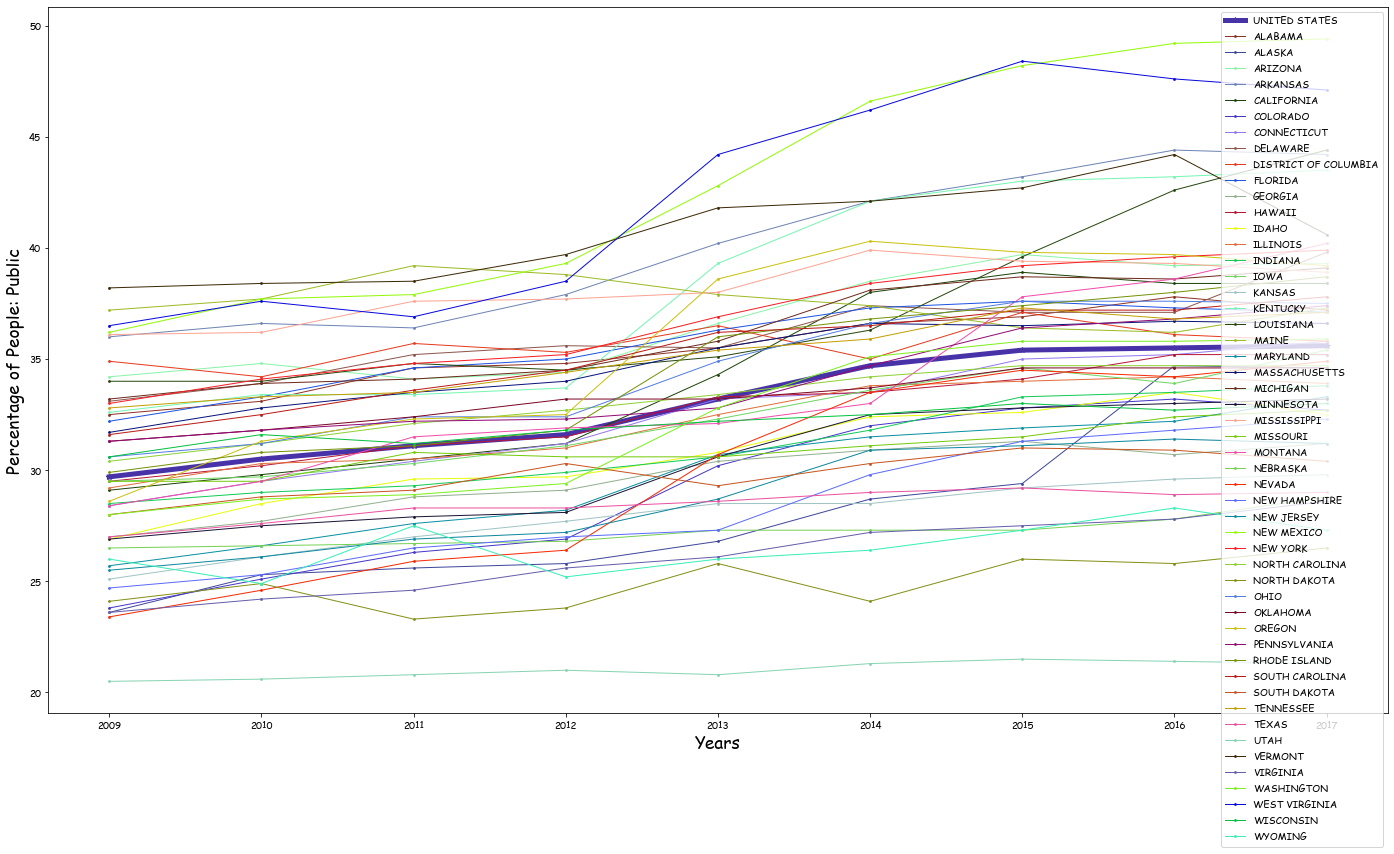

0  Years   USA    AL    AK    AZ    AR    CA    CO    CT    DE  ...    SD  \
0   2009  29.7  32.5  23.6  34.2  36.0  29.1  23.8  28.4  33.1  ...  28.0   
1   2010  30.5  33.1  25.3  34.8  36.6  29.8  25.1  29.5  33.9  ...  28.8   
2   2011  31.1  34.6  25.6  34.1  36.4  30.5  26.3  30.4  35.2  ...  29.1   
3   2012  31.6  34.8  25.8  34.4  37.9  31.2  26.9  31.2  35.6  ...  30.3   
4   2013  33.2  35.5  26.8  36.6  40.2  34.3  30.2  33.2  35.5  ...  29.3   
5   2014  34.7  36.6  28.7  38.5  42.1  38.0  32.0  33.5  37.4  ...  30.3   
6   2015  35.4  36.9  29.4  39.7  43.2  38.9  32.8  35.0  37.1  ...  31.0   
7   2016  35.5  37.8  34.7  39.2  44.4  38.4  33.2  35.2  37.1  ...  30.9   
8   2017  35.6  37.2  34.6  39.3  44.2  38.4  32.7  35.8  39.8  ...  30.4   

0    TN    TX    UT    VT    VA    WA    WV    WI    WY  
0  32.8  27.0  20.5  38.2  23.6  28.0  36.5  30.6  26.0  
1  33.3  27.6  20.6  38.4  24.2  28.7  37.6  31.6  24.9  
2  33.5  28.3  20.8  38.5  24.6  28.9  36.9  31.2  27.5

AR -0.2724056904702339
AZ -0.3286286799150007
CA -0.45891546784803655
CO -0.0967553639559601
CT 0.10875016592279635
DC -0.2892453369835494
DE -0.11176311065247277
FL -0.4121347251438913
GA -0.17313666794189367
HI -0.4369281022393963
IA -0.32429648685657
ID -0.3195729286114549
IL -0.7687914723427424
IN -0.4453355070684132
KS -0.4756554471688543
KY -0.47124936595578065
LA -0.3275575798721268
MA -0.7667753468168754
MD -0.22175202052950546
ME -0.15057491777417417
MI -0.2945927417618824
MN -0.07834618380188084
MO -0.1865784849959307
MS -0.1438085136552578
MT -0.2832313744642284
NC -0.15576380331125683
ND -0.0785301827861036
NE -0.2879748600868157
NH -0.4194037200180451
NJ -0.4287033694458664
NM -0.09058506148789279
NV -0.6151120875527604
NY -0.6673948680941847
OH -0.39044936890534526
OK -0.2967121792990556
OR -0.35593992085726983
PA -0.34781025861787956
RI -0.07843373438608574
SC -0.4213653631711162
SD -0.583368710622176
TN -0.40396792476537674
TX -0.12276675527367018
UT -0.8198003899816765

In [18]:

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["font.family"] = "fantasy"
import numpy as np
import random
import scipy
import scipy.misc
import scipy.cluster

from pandas.io.json import json_normalize


states_and_their_abbreviations = {
        "UNITED STATES": "USA",
        "ALABAMA": "AL",
        "ALASKA": "AK",
        "ARIZONA": "AZ",
        "ARKANSAS": "AR",
        "CALIFORNIA": "CA",
        "COLORADO": "CO",
        "CONNECTICUT": "CT",
        "DELAWARE": "DE",
        "DISTRICT OF COLUMBIA": "DC",
        "D.C." :"DC",
        "FLORIDA": "FL",
        "GEORGIA": "GA",
        "GU": "Guam",
        "HAWAII": "HI",
        "IDAHO": "ID",
        "ILLINOIS": "IL",
        "INDIANA": "IN",
        "IOWA": "IA",
        "KANSAS": "KS",
        "KENTUCKY": "KY",
        "LOUISIANA": "LA",
        "MAINE": "ME",
        "MARYLAND": "MD",
        "MASSACHUSETTS": "MA",
        "MICHIGAN": "MI",
        "MINNESOTA": "MN",
        "MISSISSIPPI": "MS",
        "MISSOURI": "MO",
        "MONTANA": "MT",
        "NEBRASKA": "NE",
        "NEVADA": "NV",
        "NEW HAMPSHIRE": "NH",
        "NEW JERSEY": "NJ",
        "NEW MEXICO": "NM",
        "NEW YORK": "NY",
        "NORTH CAROLINA": "NC",
        "NORTH DAKOTA": "ND",
        "OHIO": "OH",
        "OKLAHOMA": "OK",
        "OREGON": "OR",
        "PENNSYLVANIA": "PA",
        "RHODE ISLAND": "RI",
        "SOUTH CAROLINA": "SC",
        "SOUTH DAKOTA": "SD",
        "TENNESSEE": "TN",
        "TEXAS": "TX",
        "UTAH": "UT",
        "VERMONT": "VT",
        "VIRGINIA": "VA",
        "WASHINGTON": "WA",
        "WEST VIRGINIA": "WV",
        "WISCONSIN": "WI",
        "WYOMING": "WY",
        "YEARS" :"Years"}


def read_unemployment_by_year(start_year: int, end_year: int) -> pd.DataFrame:
    """
    :param start_year: The first year of the dataframe read in from the Unemployment Data 'Un.xlsx'. No data exists before year 2008, so this number should be 2008 at minimum.
    :param end_year: The last year of the dataframe read in from the Unemployment Data 'Un.xlsx'. No data exists beyond year 2018, so this number should be 2018 at maximum.
    :return: State_total_percentages_only_flipped. This is a pandas dataframe containing only total unemployment percentages in all states.
    """

    if start_year < 2008 or end_year > 2018 or end_year < start_year:
        print("Botched year formats!! Check input values!")
        return None

    df = pd.read_excel('Un.xlsx')
    # Data Cleaning
    df['State'] = df['State Abb.'].map(lambda x: x.split(',')[1])
    df.set_index('State', drop=True, append=False, inplace=True, verify_integrity=False)
    State_total = df.groupby('State').sum()
    percs_to_be_dropped = []

    thing = end_year - start_year + 1

    for i in range(thing):
        percs_to_be_dropped.append(str(start_year + i) + '_(%)')
    # percs_to_be_dropped = ['2008_(%)', '2009_(%)', '2010_(%)', '2011_(%)', etc.]
    State_total.drop(percs_to_be_dropped, axis=1, inplace=True)
    State_total.drop(['Code'], axis=1, inplace=True)

    # Find State_total['20XX_Percentage'] = State_total["20XX_Unemployed"] / State_total["20XX_Labor"]*100
    for i in range(end_year - start_year + 1):
        State_total[f'{start_year + i}'] = State_total.iloc[0:, 3 * i + 2] / State_total.iloc[0:, 3 * i] * 100
    State_total_percentages_only = State_total.iloc[0:, -(end_year - start_year + 1):]
    # The same table, but flipped around
    State_total_percentages_only_flipped = State_total_percentages_only.transpose()
    State_total_percentages_only_flipped = State_total_percentages_only_flipped.rename({'State': 'Years'}, axis=1)
    State_total_percentages_only_flipped.index.names = ['Years']
    State_total_percentages_only_flipped.plot(figsize=(32, 18))
    plt.show()

    unemployment_perc_mergeable = State_total_percentages_only_flipped.reset_index().astype({'Years': 'int32'})
    unemployment_perc_mergeable.columns = unemployment_perc_mergeable.columns.str.replace(' ', '')

    return unemployment_perc_mergeable

def read_health_care_coverage_by_year(start_year: int, end_year: int, coverage_type: str) -> pd.DataFrame:
    # This function is made for the HIC-4. Health Insurance Coverage Status and Type of Coverage by State--All Persons files
    # It should work on similar files as long as they are also downloaded from: https://www.census.gov/library/publications/2019/demo/p60-267.html
    """
    :param start_year: The first year where the output dataframe will have. Should be 2008 minimum.
    :param end_year: The last year where the output dataframe will have. Should be 2018 maximum.
    :param coverage_type: Can be 'Uninsured', 'Public', 'Private', '..Employer-based', '..VA Care' etc.
    :return: A dataframe which describes the insurance type's coverage in all states.
    """
    if start_year < 2008 or end_year > 2018 or end_year < start_year:
        print("Botched year formats!! Check input values!")
        return None

    hc_converage = pd.read_excel('hic04_acs.xls', skiprows=[0, 1, 2]).dropna(thresh=2)
    years = list(range(end_year, start_year-1, -1))

    each_year_sub = ['Estimate_number', 'Margin_of_Error_number', 'Percentage', 'Margin_of_Error_percentage']
    headers_for_hc_coverage_census = ['Nation/State', 'Coverage Type']

    for each in years:
        for each_sub in each_year_sub:
            headers_for_hc_coverage_census.append(str(each) + '_' + each_sub)

    # Subset the dataframe according to speicified year range, then assign headers to the subset
    hc_converage = hc_converage.iloc[:, 0: len(headers_for_hc_coverage_census)]
    hc_converage.columns = headers_for_hc_coverage_census
    hc_converage = hc_converage[hc_converage['Coverage Type'].notna()].ffill(axis=0)

    iloc_column_num_list = [0, 1]
    for i in range(end_year - start_year + 1):
        iloc_column_num_list.append((i+1)*4)

    # The original Excel file is
    hc_converage_estimate_percentages_only = hc_converage.iloc[0:, iloc_column_num_list]

    # Inspect only the "Uninsured" percentage, including a nationwide one
    hc_uninsured_perc = hc_converage_estimate_percentages_only[
        hc_converage_estimate_percentages_only['Coverage Type'] == coverage_type]

    casting_dict = {}
    for i in range(end_year, start_year - 1, -1):
        casting_dict.update({str(i) + '_Percentage': 'float64'})

    hc_uninsured_perc = hc_uninsured_perc.drop(['Coverage Type'], axis=1).reset_index().drop(['index'], axis=1).replace(
        "N", np.nan).bfill(axis=1).astype(casting_dict)

    hc_uninsured_perc_flipped = hc_uninsured_perc.transpose().reset_index()
    hc_uninsured_perc_flipped.columns = hc_uninsured_perc_flipped.iloc[0]
    hc_uninsured_perc_flipped = hc_uninsured_perc_flipped.rename({'Nation/State': 'Years'}, axis=1)
    hc_uninsured_perc_flipped = hc_uninsured_perc_flipped[1:].iloc[::-1].reset_index().drop(['index'], axis=1)
    hc_uninsured_perc_flipped['Years'] = hc_uninsured_perc_flipped['Years'].str.rstrip('egatnecreP_').astype(
        {'Years': 'int'})
    plt.figure(figsize=(24, 13))
    plt.plot('Years', 'UNITED STATES', data=hc_uninsured_perc_flipped, marker='*', color='#4832a8', linewidth=5)
    for each_state in hc_uninsured_perc_flipped.columns[2:]:
        plt.plot('Years', each_state, data=hc_uninsured_perc_flipped, marker='p', markersize=2,
                 color=(random.random(), random.random(), random.random()), linewidth=1)
    plt.legend()
    plt.xlabel('Years', fontsize='xx-large')
    plt.ylabel('Percentage of People: ' + coverage_type, fontsize='xx-large')
    plt.show()

    # Also converting all state names to their abbreviated forms for convenience
    # Conversion standard referenced from: https://gist.github.com/mshafrir/2646763
    hc_uninsured_perc_mergeable = hc_uninsured_perc_flipped.rename(columns=states_and_their_abbreviations)
    # Converts rates into float64 so correlations can be drawn
    for each in hc_uninsured_perc_mergeable.columns:
        if hc_uninsured_perc_mergeable[each].dtype == 'object':
            hc_uninsured_perc_mergeable = hc_uninsured_perc_mergeable.astype({each: 'float64'})

    # hc_uninsured_perc_mergeable = hc_uninsured_perc_mergeable.drop(['USA'], axis=1)
    return hc_uninsured_perc_mergeable

def read_household_income_by_year(start_year: int, end_year: int) -> pd.DataFrame:
    """
    :param start_year: The first year where the output dataframe will have. Should be 1984 minimum.
    :param end_year: The last year where the output dataframe will have. Should be 2018 maximum.
    :return: A dataframe recording household income in USD within each state, subsetted by the year range specified.
    """
    if start_year < 1984 or end_year > 2018 or end_year < start_year:
        print("Botched year formats!! Check input values!")
        return None

    df = pd.read_excel('Household Income.xls')
    df_flipped = df.transpose().reset_index()
    df_flipped.columns = df_flipped.iloc[0]
    df_flipped = df_flipped.rename({'States': 'Years'}, axis=1)
    df_flipped = df_flipped[1:].iloc[::-1].reset_index().drop(['index'], axis=1)
    df_flipped = df_flipped.astype({"Years": 'int32'})
    # Note to self: For Pandas, the "AND" condition is denoted by "&" not "and"
    df_flipped = df_flipped.loc[(df_flipped['Years'] >= start_year) & (df_flipped['Years'] <= end_year)]
    # For some reason, this dataframe's Years are sorted in descending order. It does not impede merging with other frames, but an ascending sort is left here just in case.
    # df_flipped = df_flipped.sort_values(by='Years', ascending=True)

    # Plotting
    plt.figure(figsize=(24, 13))
    plt.plot('Years', 'United States', data=df_flipped, marker='*', color='#4832a8', linewidth=5)
    for each_state in df_flipped.columns[2:]:
        plt.plot('Years', each_state, data=df_flipped, marker='p', markersize=2,
                 color=(random.random(), random.random(), random.random()), linewidth=1)
    plt.legend()
    plt.xlabel('Years', fontsize='xx-large')
    plt.ylabel('Household Income (USD)', fontsize='xx-large')
    plt.show()

    # Transforming the dataframe column names to adhere to the same format as other methods
    df_flipped.columns = df_flipped.columns.str.upper()
    df_flipped = df_flipped.rename(columns=states_and_their_abbreviations)

    # Type casting to make the dataframe returned more mergeable with others
    for each in df_flipped.columns:
        if df_flipped[each].dtype == 'object':
            df_flipped = df_flipped.astype({each: 'float64'})

    return df_flipped

def read_household_income_by_year_ver2(start_year: int, end_year: int) -> pd.DataFrame:
    """
    :param start_year: The first year where the output dataframe will have. Should be 1984 minimum.
    :param end_year: The last year where the output dataframe will have. Should be 2018 maximum.
    :return: A dataframe recording household income in USD within each state, subsetted by the year range specified.
    """
    if start_year < 1984 or end_year > 2018 or end_year < start_year:
        print("Botched year formats!! Check input values!")
        return None

    raw_hh_income_by_state = pd.read_excel('h08.xls')

    start_row_index = 0
    end_row_index = 0
    max_year = 0
    for i in range(len(raw_hh_income_by_state)):
        if raw_hh_income_by_state.iloc[i, 0] == 'CURRENT DOLLARS':
            start_row_index = i + 1
            max_year = int(raw_hh_income_by_state.iloc[i + 1, 1])
        if raw_hh_income_by_state.iloc[i, 0] == str(max_year) + ' DOLLARS':
            end_row_index = i - 1

    skiprow_list = list(range(start_row_index + 1))
    nrow_number = end_row_index - (start_row_index + 1)

    hh_income_by_state = pd.read_excel('h08.xls', skiprows=skiprow_list, nrows=nrow_number + 1)

    hh_header = list(hh_income_by_state.columns)
    hh_first_row = list(hh_income_by_state.iloc[0, :])
    for i in range(len(hh_header)):
        if hh_header[i] == 'State':
            hh_header[i] = hh_header[i]
        else:
            if 'Unnamed' in str(hh_header[i]):
                hh_header[i] = old_header_value
            else:
                old_header_value = hh_header[i]

            hh_header[i] = str(hh_header[i]) + ' ' + str(hh_first_row[i]).replace('\n', ' ')

    hh_income_by_state.columns = hh_header
    hh_income_by_state = hh_income_by_state.drop(hh_income_by_state.index[0])

    # hh_header

    drop_list = []
    for i in hh_header:
        if 'Standard error' in i:
            drop_list.append(i)

    hh_income_by_state = hh_income_by_state.drop(columns=drop_list)
    hh_income_by_state.columns = hh_income_by_state.columns.str.replace(' Median income', '')

    hh_header = list(hh_income_by_state.columns)
    year_revised_dict = {}
    for i in hh_header:
        if '(' in i:
            if str(i)[0:4] in year_revised_dict:
                if year_revised_dict[str(i)[0:4]] < str(i)[i.find('(') + 1:i.find(')')]:
                    year_revised_dict[str(i)[0:4]] = str(i)[i.find('(') + 1:i.find(')')]
            else:
                year_revised_dict[str(i)[0:4]] = str(i)[i.find('(') + 1:i.find(')')]

    drop_list = []
    for i in hh_header:
        if str(i)[0:4] in year_revised_dict and str(i)[i.find('(') + 1:i.find(')')] != year_revised_dict[str(i)[0:4]]:
            drop_list.append(i)

    hh_income_by_state = hh_income_by_state.drop(columns=drop_list)

    hh_header = list(hh_income_by_state.columns)
    for i in range(len(hh_header)):
        if '(' in hh_header[i]:
            hh_header[i] = str(hh_header[i])[0:4]
    hh_income_by_state.columns = hh_header
    hh_income_by_state = hh_income_by_state.reset_index().drop(['index'], axis=1)

    # %%

    # Flip Household Income dataframe
    hh_income_by_state_flipped = hh_income_by_state.transpose().reset_index()
    hh_income_by_state_flipped.columns = hh_income_by_state_flipped.iloc[0]
    hh_income_by_state_flipped = hh_income_by_state_flipped.rename({'State': 'Years'}, axis=1)
    hh_income_by_state_flipped = hh_income_by_state_flipped[1:].iloc[::-1].reset_index().drop(['index'], axis=1)
    hh_income_by_state_flipped = hh_income_by_state_flipped.astype({"Years": 'int32'})
    # Note to self: For Pandas, the "AND" condition is denoted by "&" not "and"
    hh_income_by_state_flipped = hh_income_by_state_flipped.loc[(hh_income_by_state_flipped['Years'] >= start_year) & (hh_income_by_state_flipped['Years'] <= end_year)]
    # Transforming the dataframe column names to adhere to the same format as other methods
    hh_income_by_state_flipped.columns = hh_income_by_state_flipped.columns.str.upper()
    hh_income_by_state_flipped = hh_income_by_state_flipped.rename(columns=states_and_their_abbreviations)

    # Type casting to make the dataframe returned more mergeable with others
    for each in hh_income_by_state_flipped.columns:
        if hh_income_by_state_flipped[each].dtype == 'object':
            hh_income_by_state_flipped = hh_income_by_state_flipped.astype({each: 'float64'})
    return hh_income_by_state_flipped

def read_cpi_by_year(start_year: int, end_year: int) -> pd.DataFrame:
    """
    :param start_year: The first year where the output dataframe will have. Should be 1935 minimum.
    :param end_year: The last year where the output dataframe will have. Should be 2020 maximum.
    :return: A dataframe recording household income in USD within each state, subsetted by the year range specified.
    """
    raw_cpi_all = pd.read_csv('cu.data.1.AllItems.txt', sep='\t')
    raw_cpi_medical = pd.read_csv('cu.data.15.USMedical.txt', sep='\t')

    cpi_all_yearly = raw_cpi_all.groupby('year').mean()
    cpi_all_yearly = cpi_all_yearly.drop(['footnote_codes'], axis=1)
    cpi_all_yearly = cpi_all_yearly.reset_index()
    cpi_all_yearly.columns = cpi_all_yearly.columns.str.replace(' ', '')
    cpi_all_yearly.columns = ['Years', 'CPI All items']

    cpi_medical_yearly = raw_cpi_medical.groupby('year').mean()
    cpi_medical_yearly = cpi_medical_yearly.drop(['footnote_codes'], axis=1)
    cpi_medical_yearly = cpi_medical_yearly.reset_index()
    cpi_medical_yearly.columns = cpi_medical_yearly.columns.str.replace(' ', '')
    cpi_medical_yearly.columns = ['Years', 'CPI Medical']

    cpi_merge = pd.merge(cpi_all_yearly, cpi_medical_yearly, how='inner', on='Years')
    cpi_merge['CPI All items Growth'] = cpi_merge['CPI All items'].pct_change()
    cpi_merge['CPI Medical Growth'] = cpi_merge['CPI Medical'].pct_change()
    cpi_merge = cpi_merge.loc[(cpi_merge['Years'] >= start_year) & (cpi_merge['Years'] <= end_year)]

    return cpi_merge


def merging_dataframes_on_years_plus_correlations(dataframe_1: pd.DataFrame, dataframe_2: pd.DataFrame, suffix_1: str, suffix_2: str, compare_growth_rate: str)-> pd.DataFrame:
    """
    :param dataframe_1: A pandas dataframe with a "Years" (int32) denoting years in the Solar Calendar format, and statistics (float64) for each state in U.S.A. using state codes (IL, TX, VA, etc.)
    :param dataframe_2: Another pandas dataframe with an exact same structure as dataframe_1.
    :param suffix_1: Suffixes to add to columns from dataframe_1.
    :param suffix_2: Suffixes to add to columns from dataframe_2.
    :param compare_growth_rate: This value decides how the correlation will be drawn between the percentage changes of values from both dataframes.
        'None' makes the program draw correlations between raw values, which might overestimate the correlations.
        'First' makes it draw correlations between growth rates from the first dataframe's columns and raw values from the second.
        'Second' makes it draw correlations between raw values from the first dataframe's columns and growth rates from the second.
        'Both' makes it draw correlations between growth rates from both dataframe's columns.

        We found the inclusion of this option necessary because we want to give users the ability to judge and choose the method which avoids common time-series-related mistakes:
        https://www.svds.com/avoiding-common-mistakes-with-time-series/

    :return: A merged dataframe with columns from both input dataframes. Because the join type is inner, only years which both dataframe contain will be left.
    """

    # Allocate the 2 dataframes to a location in memory with suffixes to differentiate their columns pointing to the same years
    dataframe_1 = dataframe_1.reset_index().add_suffix('_'  + suffix_1)
    dataframe_2 = dataframe_2.reset_index().add_suffix('_'  + suffix_2)

    dataframe_merged = pd.merge(dataframe_1, dataframe_2,  left_on = "Years" + '_'  + suffix_1, right_on = "Years" + '_'  + suffix_2, how='inner')

    # Lists out columns from both dataframes
    df1_cols = [col for col in dataframe_merged.columns if '_'  + suffix_1 in col and "Years" not in col and "index" not in col]
    df2_cols = [col for col in dataframe_merged.columns if '_'  + suffix_2 in col and "Years" not in col and "index" not in col]

    # Then, iterates through each states where columns of same states match. Prints outs the correlation value for each state
    if compare_growth_rate == "Both":
        print(suffix_1, "&", suffix_2, "Correlations w/ growth rates:")
    elif compare_growth_rate == "None":
        print(suffix_1, "&", suffix_2, "Correlations w/ raw values:")
    elif compare_growth_rate == "First":
        print(suffix_1, " growth rate &", suffix_2, " raw value Correlations:")
    elif compare_growth_rate == "Second":
        print(suffix_1, " raw value &", suffix_2, " growth rate Correlations:")

    for each_df1_col in df1_cols:
        for each_df2_col in df2_cols:
            if each_df1_col[0:2] == each_df2_col[0:2]:
                if compare_growth_rate == "Both":
                    print(each_df1_col[0:2],
                          dataframe_merged.pct_change()[each_df1_col].corr(dataframe_merged.pct_change()[each_df2_col]))
                elif compare_growth_rate == "None":
                    print(each_df1_col[0:2], dataframe_merged[each_df1_col].corr(dataframe_merged[each_df2_col]))
                elif compare_growth_rate == "First":
                    print(each_df1_col[0:2], dataframe_merged.pct_change()[each_df1_col].corr(dataframe_merged[each_df2_col]))
                elif compare_growth_rate == "Second":
                    print(each_df1_col[0:2], dataframe_merged[each_df1_col].corr(dataframe_merged.pct_change()[each_df2_col]))

    dataframe_merged = dataframe_merged.loc[:,~dataframe_merged.columns.str.startswith('index')]

    return dataframe_merged

def main_test():
    test_df_un = read_unemployment_by_year(2008, 2018)
    print(test_df_un)
    #print(test_df_un.dtypes)

    test_df_hc = read_health_care_coverage_by_year(2009, 2017, 'Public')
    print(test_df_hc)
    #print(test_df_hc.dtypes)

    #test_df_hh_ic = read_household_income_by_year(1991, 2018)
    #print(test_df_hh_ic)
    #print(test_df_hh_ic.dtypes)

    test_df_hh_ic = read_household_income_by_year_ver2(1991, 2018)
    print(test_df_hh_ic)
    #print(test_df_hh_ic.dtypes)

    test_df_cpi = read_cpi_by_year(2003, 2020)
    print(test_df_cpi)
    #print(test_df_cpi.dtypes)

    test_df_merged = merging_dataframes_on_years_plus_correlations(test_df_un, test_df_hh_ic, "Unemployment", "HouseHold_Income", "Second")
    print(test_df_merged)
    #print(test_df_merged.dtypes)

# main_test()

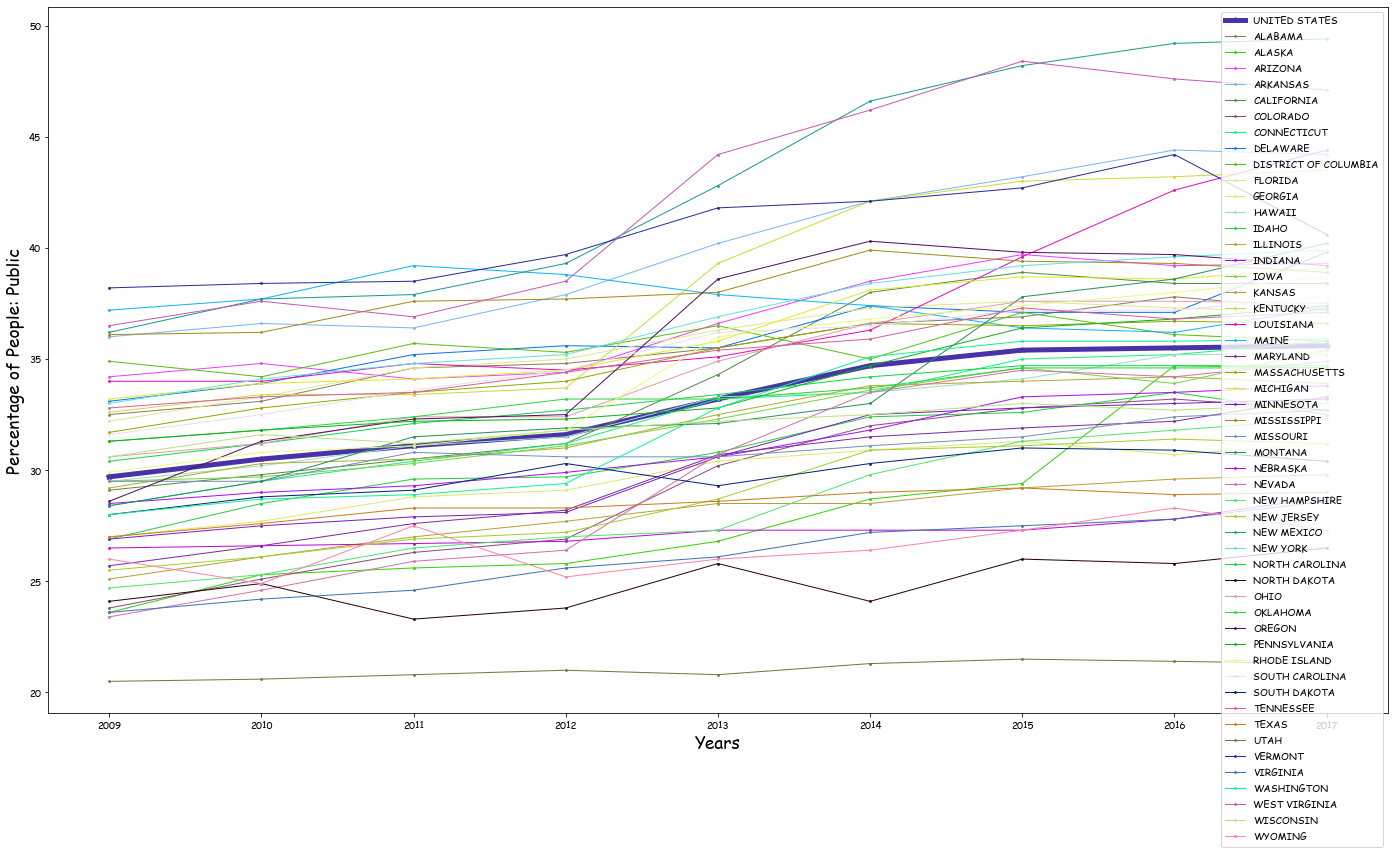

,Years,USA,AL,AK,AZ,AR,CA,CO,CT,DE,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
0,2009,29.7,32.5,23.6,34.2,36.0,29.1,23.8,28.4,33.1,...,28.0,32.8,27.0,20.5,38.2,23.6,28.0,36.5,30.6,26.0
1,2010,30.5,33.1,25.3,34.8,36.6,29.8,25.1,29.5,33.9,...,28.8,33.3,27.6,20.6,38.4,24.2,28.7,37.6,31.6,24.9
2,2011,31.1,34.6,25.6,34.1,36.4,30.5,26.3,30.4,35.2,...,29.1,33.5,28.3,20.8,38.5,24.6,28.9,36.9,31.2,27.5
3,2012,31.6,34.8,25.8,34.4,37.9,31.2,26.9,31.2,35.6,...,30.3,34.4,28.3,21.0,39.7,25.6,29.4,38.5,31.8,25.2
4,2013,33.2,35.5,26.8,36.6,40.2,34.3,30.2,33.2,35.5,...,29.3,35.4,28.6,20.8,41.8,26.1,32.8,44.2,32.2,26.0
5,2014,34.7,36.6,28.7,38.5,42.1,38.0,32.0,33.5,37.4,...,30.3,35.9,29.0,21.3,42.1,27.2,35.1,46.2,32.5,26.4
6,2015,35.4,36.9,29.4,39.7,43.2,38.9,32.8,35.0,37.1,...,31.0,37.3,29.2,21.5,42.7,27.5,35.8,48.4,33.0,27.3
7,2016,35.5,37.8,34.7,39.2,44.4,38.4,33.2,35.2,37.1,...,30.9,36.8,28.9,21.4,44.2,27.8,35.8,47.6,32.7,28.3
8,2017,35.6,37.2,34.6,39.3,44.2,38.4,32.7,35.8,39.8,...,30.4,37.1,29.0,21.3,40.6,28.6,35.9,47.1,33.0,27.3


In [19]:
test_df_hc = read_health_care_coverage_by_year(2009, 2017, 'Public')
test_df_hc

In [52]:
df_for_choropleth = pd.DataFrame({'State':test_df_hc.loc[test_df_hc['Years'] == 2009].columns[2:].tolist(),
              'Value':test_df_hc.loc[test_df_hc['Years'] == 2009].squeeze().tolist()[2:]}) 
  
df_for_choropleth

,State,Value
0,AL,32.5
1,AK,23.6
2,AZ,34.2
3,AR,36.0
4,CA,29.1
5,CO,23.8
6,CT,28.4
7,DE,33.1
8,DC,34.9
9,FL,32.2


In [53]:
# Original structure of this code is referenced from: https://plotly.com/python/choropleth-maps/

fig = pgo.Figure(data=pgo.Choropleth(
    locations=df_for_choropleth['State'], # Spatial coordinates
    z = df_for_choropleth['Value'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Greens',
    colorbar_title = "Coverage %",
))

fig.update_layout(
    title_text = 'US HC Coverage by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()